# Source Data Analysis
### By Xavier Moskala exm413@case.edu

In [2]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin

In [3]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:         
        file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path
    path = path.replace(" ", "%20")
    return path

In [4]:
# Read spectrum files (.spe) as .csv with pandas

## Number of samples to average through 
endnumber = 2

## Readings
### Background
BgFiles = read_multi_csv(0,endnumber,"/1-19-23/Background/Background00")    #Read files
Bg = aver(BgFiles)    #Average

## Barium (Ba133)
Ba133Files = read_multi_csv(0,endnumber,"/1-19-23/Ba133/Ba00")    #Read files
Ba133 = aver(Ba133Files) - Bg    #Average & subtract Bg

## Cadmium (Cd109)
Cd109Files = read_multi_csv(0,endnumber,"/1-19-23/Cd109/Cd00")    #Read files
Cd109 = aver(Cd109Files) - Bg     #Average & subtract Bg

## Cobalt (Co57)
Co57Files = read_multi_csv(0,endnumber,"/1-19-23/Co57/Co00")    #Read files
Co57 = aver(Co57Files) - Bg     #Average & subtract Bg

## Cobalt (Co60)
Co60Files = read_multi_csv(0,endnumber,"/1-19-23/Co60/Co00")    #Read files
Co60 = aver(Co60Files) - Bg     #Average & subtract Bg

## Cesium (Cs137)
Cs137Files = read_multi_csv(0,endnumber,"/1-19-23/Cs137/Cs00")    #Read files
Cs137 = aver(Cs137Files) - Bg     #Average & subtract Bg

## Manganese (Mn54)
Mn54Files = read_multi_csv(0,endnumber,"/1-19-23/Mn54/Mn00")    #Read files
Mn54 = aver(Mn54Files) - Bg     #Average & subtract Bg

## Sodium (Na22)
Na22Files = read_multi_csv(0,endnumber,"/1-19-23/Na22/Na00")    #Read files
Na22 = aver(Na22Files) - Bg     #Average & subtract Bg

## PMT1 Sodium 
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]
PMT1Bg=pd.read_csv(url("/1-31-23/Bg_PMT1.Spe"), skiprows=skip, header=0, names=["Data"])
#PMT1M1Files = read_multi_csv(0,endnumber,"/1-26-23/PMT1_Na22_Mamp/Na2200")    #Read files
#PMT1M1 = aver(PMT1M1Files) - PMT1Bg     #Average & subtract Bg 
PMT1M2Files = read_multi_csv(0,endnumber,"/1-31-23/PMT1_Na22_Mamp/Na00")    #Read files
PMT1M2 = aver(PMT1M2Files) - PMT1Bg     #Average & subtract Bg
PMT1RFiles = read_multi_csv(0,endnumber,"/1-31-23/PMT1_Na22_Ramp/Na00")    #Read files
PMT1R = aver(PMT1RFiles) - PMT1Bg     #Average & subtract Bg
PMT1LFiles = read_multi_csv(0,endnumber,"/1-31-23/PMT1_Na22_Lamp/Na00")    #Read files
PMT1L = aver(PMT1LFiles) - PMT1Bg     #Average & subtract Bg

In [6]:
#Plot Amplification Comparison
Bin = 1 # Bin size from calibration on Maestro
x = np.arange(0,2048,Bin)[0:len(Bg)]

fig, ax = plt.subplots()
#ax.plot(x, Bg, label="Bg")
#ax.plot(x,Ba133, label="Ba133"); ax.axvline(383) ;# ax.axvline(355) 
#ax.plot(x,Cd109, label="Cd109");ax.axvline(97) ;# ax.axvline(88) 
#ax.plot(x,Co57, label="Co57"); ax.axvline(130);# ax.axvline(122) 
#ax.plot(x,Co60, label="Co60"); ax.axvline(1095); ax.axvline(1230);# ax.axvline(1173); ax.axvline(1332)
#ax.plot(x,Cs137, label="Cs137"); ax.axvline(674);# ax.axvline(661.2) 
#ax.plot(x,Mn54, label="Mn54");# ax.axvline(806);# ax.axvline(835)  
ax.plot(x,Na22, label="Na22"); ax.axvline(502); ax.axvline(1217);# ax.axvline(511); ax.axvline(1274)
#ax.plot(x,PMT1M1, label="PMT1M1");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1M2, label="PMT1M2");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1L, label="PMT1L");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1R, label="PMT1R");# ax.axvline(511); ax.axvline(1274) 

#plt.xlim(0,Bin*len(Bg))

plt.xlim(0,1600)
plt.ylim(0,80000)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()


#Mamp for PMT1
#Lamp for PMT2



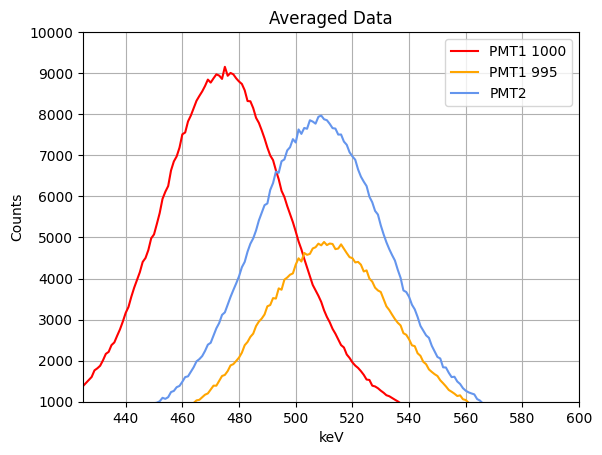

In [7]:
# Try to put the spectra on top of one another
endnumber=2

PMT2Files = read_multi_csv(0,endnumber,"/1-31-23/PMT2_Na22/Na00")    #Read files
PMT2 = aver(PMT2Files) - Bg     #Average & subtract Bg 

PMT1M3Files = read_multi_csv(0,endnumber,"/1-31-23/PMT1_1005/Na00")    #Read files
PMT1M3 = aver(PMT1M3Files) - PMT1Bg     #Average & subtract Bg 

PMT1M4Files = read_multi_csv(0,endnumber,"/1-31-23/PMT1_995/Na00")    #Read files
PMT1M4 = aver(PMT1M4Files) - PMT1Bg     #Average & subtract Bg 

fig, ax = plt.subplots()
ax.plot(x,PMT1M2, label="PMT1 1000", color="red")
ax.plot(x,PMT1M4, label="PMT1 995", color="orange")
#ax.semilogy(x,PMT1M3, label="PMT1 1005", color="black")
ax.plot(x,PMT2, label="PMT2", color="cornflowerblue")

plt.xlim(425,600)
plt.ylim(1000,1e4)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

In [8]:
#TODO: Find Channel v Energy curve/relationship
nrg = np.array([88,122,511,661.2,835,1173,1274,1332]) 
channel = np.array([97,130,502,674,806,1095,1217,1230])

def lin(x, m, b):
    return m*x + b
p1, C1 = curve_fit(lin, channel, nrg, absolute_sigma=True)
sigp1 = np.sqrt(np.diag(C1))
m1 = p1[0]
b1 = p1[1]
err1 = sigp1[0]

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c
p2, C2 = curve_fit(quadratic, channel, nrg, p0=np.array([1.0,1.0,1.0]), absolute_sigma=True)
sigp2 = np.sqrt(np.diag(C2))
a2 = p2[0]
b2 = p2[1]
c2 = p2[2]
err2 = sigp2[0]
print(a2,b2,c2)

9.55940239321107e-05 0.9563060686552335 -4.55946792359908


0.0008330474821122247 2.5996151327765982e-06


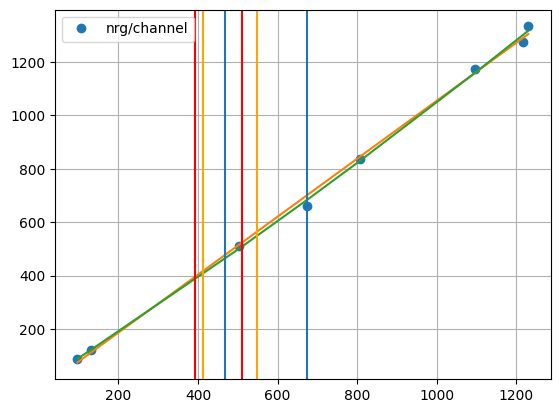

In [9]:
fig, ax = plt.subplots()
ax.plot(channel, nrg, label='nrg/channel',marker='o', ls='')
ax.plot(channel, lin(channel,m1,b1))
ax.plot(channel, quadratic(channel,a2,b2,c2))

#Cs
ax.axvline(674)
ax.axvline(468) #deg0 disc100 2.2us 7.5in


ax.axvline(548, color="orange")
ax.axvline(412, color="orange") #deg30 disc100 2.2us 5.5in


#Na
ax.axvline(511,color='red')
#ax.axvline(429,color='red') #in between 2 pmts, number from 1/31
ax.axvline(392,color='red')

ax.grid()
ax.legend()
plt.show
print(err1,err2)

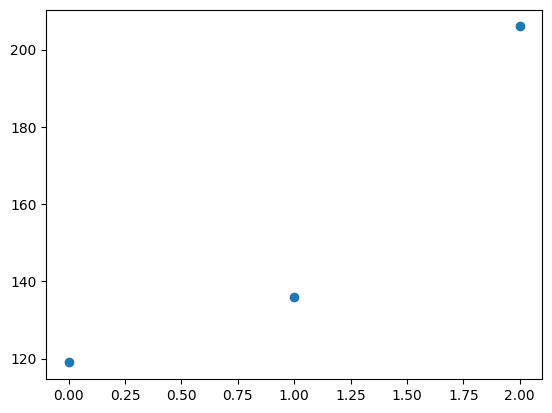

In [10]:
difs = np.array([511-392,548-412,674-468])

fig, ax = plt.subplots()
ax.plot(difs, marker='o', ls='')
